# Modelos

## 1. Cargue de Librerias, base de datos y entrenamiento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn import tree

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC, SVR, LinearSVR

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70030 entries, 0 to 70029
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      70030 non-null  int64  
 1   country         70030 non-null  object 
 2   description     70030 non-null  object 
 3   points          70030 non-null  int64  
 4   price           70030 non-null  float64
 5   taster_name     70030 non-null  object 
 6   variety         70030 non-null  object 
 7   winery          70030 non-null  object 
 8   Year            70030 non-null  int64  
 9   region          70030 non-null  object 
 10  Latitude        70030 non-null  float64
 11  Longitude       70030 non-null  float64
 12  Lat_x           70030 non-null  float64
 13  Long_x          70030 non-null  float64
 14  temp_anual      70030 non-null  float64
 15  temp_max_anual  70030 non-null  float64
 16  temp_min_anual  70030 non-null  float64
 17  pre_anual       70030 non-null 

In [4]:
df.isnull().sum()

Unnamed: 0        0
country           0
description       0
points            0
price             0
taster_name       0
variety           0
winery            0
Year              0
region            0
Latitude          0
Longitude         0
Lat_x             0
Long_x            0
temp_anual        0
temp_max_anual    0
temp_min_anual    0
pre_anual         0
etp_anual         0
dtype: int64

In [5]:
#Deleteing rows with price = 0
df.dropna(subset = ['price'], inplace=True)
df.isnull().sum()

Unnamed: 0        0
country           0
description       0
points            0
price             0
taster_name       0
variety           0
winery            0
Year              0
region            0
Latitude          0
Longitude         0
Lat_x             0
Long_x            0
temp_anual        0
temp_max_anual    0
temp_min_anual    0
pre_anual         0
etp_anual         0
dtype: int64

In [6]:
df.drop(columns=['description', 'variety', 'winery', 'Latitude', 'Longitude', 'region', 'Unnamed: 0'], inplace=True)
df

,country,points,price,taster_name,Year,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
0,Portugal,87,15.0,Roger Voss,2011,41.75,-5.75,13.01,19.44,6.61,388.5,1200
1,Portugal,87,15.0,Roger Voss,2011,41.75,-5.75,13.01,19.44,6.61,388.5,1200
2,Portugal,87,17.0,Roger Voss,2011,41.75,-5.75,13.01,19.44,6.61,388.5,1200
3,Portugal,91,12.0,Roger Voss,2011,41.75,-5.75,13.01,19.44,6.61,388.5,1200
4,Portugal,87,8.0,Roger Voss,2011,41.75,-5.75,13.01,19.44,6.61,388.5,1200
...,...,...,...,...,...,...,...,...,...,...,...,...
70025,USA,84,25.0,Matt Kettmann,2012,34.75,-118.25,13.96,20.23,7.75,325.0,1176
70026,Switzerland,90,21.0,Jeff Jenssen,2012,46.75,6.75,9.15,13.46,4.87,1382.5,696
70027,France,89,14.0,Roger Voss,2012,45.25,6.25,5.61,9.20,2.05,1386.2,714
70028,France,89,18.0,Roger Voss,2012,45.75,5.75,10.71,15.25,6.22,976.2,807


In [7]:
df = pd.get_dummies(df, columns=['country', 'taster_name'])

In [8]:
data = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70030 entries, 0 to 70029
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   points                          70030 non-null  int64  
 1   price                           70030 non-null  float64
 2   Year                            70030 non-null  int64  
 3   Lat_x                           70030 non-null  float64
 4   Long_x                          70030 non-null  float64
 5   temp_anual                      70030 non-null  float64
 6   temp_max_anual                  70030 non-null  float64
 7   temp_min_anual                  70030 non-null  float64
 8   pre_anual                       70030 non-null  float64
 9   etp_anual                       70030 non-null  int64  
 10  country_Argentina               70030 non-null  uint8  
 11  country_Australia               70030 non-null  uint8  
 12  country_Austria                 

In [10]:
#First we separate our info, the X will be all the columns except the output variable, then the output variable, the test size 20% and the random state to have always the same output
# is like X, X_test, y, y_test = train_test_split(variables_X, variable_Y, test_size, random_state)
X, X_test, y, y_test = train_test_split(data.drop(columns='points'), data.points, test_size=0.2, random_state=42)

## Modelo 1: *Ridge con Polynomial Features*

In [11]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
dists = {'ridge__alpha' : uniform(loc=0, scale=200), 'poly__degree' : [1, 2]}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
ridge_CV = RandomizedSearchCV(ridge_pipe, param_distributions=dists, n_iter=30, cv=5)
#Now we train the model
ridge_CV.fit(X, y)

Wall time: 5min 48s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('ridge', Ridge())]),
                   n_iter=30,
                   param_distributions={'poly__degree': [1, 2],
                                        'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025271E20A90>})

In [12]:
ridge_CV.best_params_

{'poly__degree': 2, 'ridge__alpha': 106.04738003831098}

In [13]:
ridge_CV.score(X, y)

0.3824740087167675

In [14]:
ridge_CV.score(X_test, y_test)

0.3788614549483983

In [15]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,ridge_CV.predict(X)))

Error absoluto medio (MAE): 1.9610044245379328
Error Cuadrático Medio (MSE): 6.131935281376576
Raíz del Error Cuadrático Medio (RMSE): 2.476274476179201
Coeficiente de determinación R2: 0.3824740087167675


In [16]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,ridge_CV.predict(X_test)))

Error absoluto medio (MAE): 1.9834259935819853
Error Cuadrático Medio (MSE): 6.187401014267267
Raíz del Error Cuadrático Medio (RMSE): 2.4874486958060595
Coeficiente de determinación R2: 0.3788614549483983


## Modelo 2: *Arbol de decisión*

In [17]:
%%time
#Now we try a Tree Regressor
tree = DecisionTreeRegressor()

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
param_grid = {'max_depth' : [10, 11, 12, 13, 14, 15], 'min_samples_leaf' : [47, 48, 49, 50, 51, 52, 53]}

#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
tree_CV = GridSearchCV(tree, param_grid=param_grid)
#Now we train the model
tree_CV.fit(X, y)

Wall time: 1min 6s


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'min_samples_leaf': [47, 48, 49, 50, 51, 52, 53]})

In [18]:
print("The best Parameters are :", tree_CV.best_params_)
print("The best X,y score is: ", tree_CV.score(X, y))
print("The best X,y test score is: ", tree_CV.score(X_test, y_test))

The best Parameters are : {'max_depth': 11, 'min_samples_leaf': 48}
The best X,y score is:  0.4729605577155309
The best X,y test score is:  0.4354889867418916


In [19]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(tree_CV.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(tree_CV.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(tree_CV.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,tree_CV.predict(X)))

Error absoluto medio (MAE): 1.8068251155425177
Error Cuadrático Medio (MSE): 5.233418182294606
Raíz del Error Cuadrático Medio (RMSE): 2.2876665365158897
Coeficiente de determinación R2: 0.4729605577155309


In [20]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(tree_CV.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(tree_CV.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(tree_CV.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,tree_CV.predict(X_test)))

Error absoluto medio (MAE): 1.8706447170762823
Error Cuadrático Medio (MSE): 5.623312292925067
Raíz del Error Cuadrático Medio (RMSE): 2.3713524185420156
Coeficiente de determinación R2: 0.4354889867418916


## Modelo 3: *PCA + Ridge*

In [21]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('ridge', Ridge())
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
dists = {'ridge__alpha' : uniform(loc=0, scale=200), 'pca__n_components' : [10, 20, 30, 40, 60]}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
ridge_CV = RandomizedSearchCV(ridge_pipe, param_distributions=dists, n_iter=30, cv=5)
#Now we train the model
ridge_CV.fit(X, y)

Wall time: 1min 5s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('ridge', Ridge())]),
                   n_iter=30,
                   param_distributions={'pca__n_components': [10, 20, 30, 40,
                                                              60],
                                        'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025271E33F70>})

In [22]:
ridge_CV.best_params_

{'pca__n_components': 60, 'ridge__alpha': 171.1039731019309}

In [23]:
ridge_CV.score(X, y)

0.2548818219235661

In [24]:
ridge_CV.score(X_test, y_test)

0.2760474887881852

In [25]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,ridge_CV.predict(X)))

Error absoluto medio (MAE): 2.152764063564753
Error Cuadrático Medio (MSE): 7.398905486467708
Raíz del Error Cuadrático Medio (RMSE): 2.7200929187194522
Coeficiente de determinación R2: 0.2548818219235661


In [26]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,ridge_CV.predict(X_test)))

Error absoluto medio (MAE): 2.163466513095849
Error Cuadrático Medio (MSE): 7.211570651731472
Raíz del Error Cuadrático Medio (RMSE): 2.6854367711289484
Coeficiente de determinación R2: 0.2760474887881852


**Se repite el modelo con nuevos parametros**

In [27]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('ridge', Ridge())
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
dists = {'ridge__alpha' : uniform(loc=0, scale=200), 'pca__n_components' : [60, 62, 64, 66]}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
ridge_CV = RandomizedSearchCV(ridge_pipe, param_distributions=dists, n_iter=30, cv=5)
#Now we train the model
ridge_CV.fit(X, y)

Wall time: 51.4 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('ridge', Ridge())]),
                   n_iter=30,
                   param_distributions={'pca__n_components': [60, 62, 64, 66],
                                        'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002526E7DF490>})

In [28]:
ridge_CV.best_params_

{'pca__n_components': 66, 'ridge__alpha': 194.54291174331303}

In [29]:
ridge_CV.score(X, y)

0.2556264870482724

In [30]:
ridge_CV.score(X_test, y_test)

0.2763337663713801

In [31]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,ridge_CV.predict(X)))

Error absoluto medio (MAE): 2.1514005375839265
Error Cuadrático Medio (MSE): 7.391511079729445
Raíz del Error Cuadrático Medio (RMSE): 2.718733359439547
Coeficiente de determinación R2: 0.2556264870482724


In [32]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,ridge_CV.predict(X_test)))

Error absoluto medio (MAE): 2.1631227038269514
Error Cuadrático Medio (MSE): 7.208718930126472
Raíz del Error Cuadrático Medio (RMSE): 2.684905758146172
Coeficiente de determinación R2: 0.2763337663713801


## Modelo 4: *PCA + Ridge + Polynomial Features*

In [33]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('pca', PCA()),
    ('ridge', Ridge())
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
dists = {'ridge__alpha' : uniform(loc=0, scale=200), 'poly__degree': [1,2], 'pca__n_components' : [30, 40, 50, 60]}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
ridge_CV = RandomizedSearchCV(ridge_pipe, param_distributions=dists, n_iter=30, cv=5)
#Now we train the model
ridge_CV.fit(X, y)

Wall time: 8min 58s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('pca', PCA()),
                                             ('ridge', Ridge())]),
                   n_iter=30,
                   param_distributions={'pca__n_components': [30, 40, 50, 60],
                                        'poly__degree': [1, 2],
                                        'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025271CE0100>})

In [34]:
print("The best Parameters are :", ridge_CV.best_params_)
print("The best X,y score is: ", ridge_CV.score(X, y))
print("The best X,y test score is: ", ridge_CV.score(X_test, y_test))
print("The MAE X,y is: ", mean_absolute_error(ridge_CV.predict(X), y))
print("The MAE test X,y is: ", mean_absolute_error(ridge_CV.predict(X_test), y_test))

The best Parameters are : {'pca__n_components': 60, 'poly__degree': 1, 'ridge__alpha': 196.27535047048482}
The best X,y score is:  0.25488112513872285
The best X,y test score is:  0.27601389380117225
The MAE X,y is:  2.1528495243624697
The MAE test X,y is:  2.1635619060054876


In [35]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(ridge_CV.predict(X), y))

Error absoluto medio (MAE): 2.1528495243624697
Error Cuadrático Medio (MSE): 7.398912405430836
Raíz del Error Cuadrático Medio (RMSE): 2.7200941905439295
Coeficiente de determinación R2: -1.9409891676088904


In [36]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(ridge_CV.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(ridge_CV.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(ridge_CV.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(ridge_CV.predict(X_test), y_test))

Error absoluto medio (MAE): 2.1635619060054876
Error Cuadrático Medio (MSE): 7.211905304375998
Raíz del Error Cuadrático Medio (RMSE): 2.685499079198501
Coeficiente de determinación R2: -2.522297792280127


## Modelo 5: *Regresión lineal*

In [37]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
#dists = {'ridge__alpha' : uniform(loc=0, scale=200), 'poly__degree': [1,2], 'pca__n_components' : [30, 40, 50, 60]}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
#Now we train the model
linear_pipe.fit(X, y)

Wall time: 321 ms


Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [38]:
print("The best X,y score is: ", linear_pipe.score(X, y))
print("The best X,y test score is: ", linear_pipe.score(X_test, y_test))
print("The MAE X,y is: ", mean_absolute_error(linear_pipe.predict(X), y))
print("The MAE test X,y is: ", mean_absolute_error(linear_pipe.predict(X_test), y_test))

The best X,y score is:  0.2562773006049426
The best X,y test score is:  -1.2877764535941084e+18
The MAE X,y is:  2.1501943618043127
The MAE test X,y is:  30263775.16614799


In [39]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(linear_pipe.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(linear_pipe.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(linear_pipe.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,linear_pipe.predict(X)))

Error absoluto medio (MAE): 2.1501943618043127
Error Cuadrático Medio (MSE): 7.385048604196308
Raíz del Error Cuadrático Medio (RMSE): 2.7175445910226217
Coeficiente de determinación R2: 0.2562773006049426


In [40]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(linear_pipe.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(linear_pipe.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(linear_pipe.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,linear_pipe.predict(X_test)))

Error absoluto medio (MAE): 30263775.16614799
Error Cuadrático Medio (MSE): 1.282803876622363e+19
Raíz del Error Cuadrático Medio (RMSE): 3581625157.135184
Coeficiente de determinación R2: -1.2877764535941084e+18


## Modelo 6: *Support Vector Machines, SVM*

In [41]:
%%time
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVR(C=1000, epsilon=1, max_iter=10000, random_state=42))
])

svm.fit(X, y)

Wall time: 2min 51s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 LinearSVR(C=1000, epsilon=1, max_iter=10000,
                           random_state=42))])

In [42]:
print("The best X,y score is: ", svm.score(X, y))
print("The best X,y test score is: ", svm.score(X_test, y_test))
print("The MAE X,y is: ", mean_absolute_error(svm.predict(X), y))
print("The MAE test X,y is: ", mean_absolute_error(svm.predict(X_test), y_test))

The best X,y score is:  0.03367518705837347
The best X,y test score is:  0.14272707474426827
The MAE X,y is:  2.2704148752770594
The MAE test X,y is:  2.2635366707544993


In [43]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(svm.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(svm.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(svm.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,svm.predict(X)))

Error absoluto medio (MAE): 2.2704148752770594
Error Cuadrático Medio (MSE): 9.595452332999269
Raíz del Error Cuadrático Medio (RMSE): 3.0976527134266147
Coeficiente de determinación R2: 0.03367518705837347


In [44]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(svm.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(svm.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(svm.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,svm.predict(X_test)))

Error absoluto medio (MAE): 2.2635366707544993
Error Cuadrático Medio (MSE): 8.539626802246707
Raíz del Error Cuadrático Medio (RMSE): 2.922263985721808
Coeficiente de determinación R2: 0.14272707474426827


## Modelo 7: *Support Vector Machines, SVM con RBF Kernel*

In [45]:
%%time
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='rbf', C=1000, epsilon=0.5))
])

svm.fit(X, y)

Wall time: 22min 37s


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVR(C=1000, epsilon=0.5))])

In [46]:
print("The best X,y score is: ", svm.score(X, y))
print("The best X,y test score is: ", svm.score(X_test, y_test))
print("The MAE X,y is: ", mean_absolute_error(svm.predict(X), y))
print("The MAE test X,y is: ", mean_absolute_error(svm.predict(X_test), y_test))

The best X,y score is:  0.48239334737287676
The best X,y test score is:  0.4509594337442103
The MAE X,y is:  1.7598939589719105
The MAE test X,y is:  1.825131240668002


In [47]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(svm.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(svm.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(svm.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,svm.predict(X)))

Error absoluto medio (MAE): 1.7598939589719105
Error Cuadrático Medio (MSE): 5.139752075089163
Raíz del Error Cuadrático Medio (RMSE): 2.2671021315964492
Coeficiente de determinación R2: 0.48239334737287676


In [48]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(svm.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(svm.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(svm.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,svm.predict(X_test)))

Error absoluto medio (MAE): 1.825131240668002
Error Cuadrático Medio (MSE): 5.469205193573564
Raíz del Error Cuadrático Medio (RMSE): 2.3386331891884122
Coeficiente de determinación R2: 0.4509594337442103


## Modelo 7: *Naïve Bayes*

In [49]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
gnb_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gnb', GaussianNB())
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
#dists = {'gnb__alpha' : uniform(loc=0, scale=200)}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
#ridge_CV = RandomizedSearchCV(ridge_pipe, param_distributions=dists, n_iter=30, cv=5)
#Now we train the model
gnb_pipe.fit(X, y)

Wall time: 150 ms


Pipeline(steps=[('scaler', MinMaxScaler()), ('gnb', GaussianNB())])

In [50]:
print("The best X,y score is: ", gnb_pipe.score(X, y))
print("The best X,y test score is: ", gnb_pipe.score(X_test, y_test))
print("The MAE X,y is: ", mean_absolute_error(gnb_pipe.predict(X), y))
print("The MAE test X,y is: ", mean_absolute_error(y_test,gnb_pipe.predict(X_test)))

The best X,y score is:  0.006657860916749964
The best X,y test score is:  0.005997429672997287
The MAE X,y is:  10.130515493359988
The MAE test X,y is:  10.173639868627731


In [51]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(gnb_pipe.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(gnb_pipe.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(gnb_pipe.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,gnb_pipe.predict(X)))

Error absoluto medio (MAE): 10.130515493359988
Error Cuadrático Medio (MSE): 116.98725546194488
Raíz del Error Cuadrático Medio (RMSE): 10.816064693868324
Coeficiente de determinación R2: -10.78138182835229


In [52]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(gnb_pipe.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(gnb_pipe.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(gnb_pipe.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,gnb_pipe.predict(X_test)))

Error absoluto medio (MAE): 10.173639868627731
Error Cuadrático Medio (MSE): 117.79251749250321
Raíz del Error Cuadrático Medio (RMSE): 10.853226132929471
Coeficiente de determinación R2: -10.824912069631436


## Modelo 8: *Support Vector Machines, SVM con RandomizedSearch*

In [53]:
%%time
#We create the Pipeline. First step, Normalize data, include the Polynomimal 
#(include bias false to remove from the Polynomial for X[0]=1) and then use the Ridge method
svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(C=1000, epsilon=0.5))
])

#In a dictionary, Step name _ _ and then parameter name, and then : with the type to do
dists = {'svm__C' : [1000, 3000, 5000], 'svm__epsilon': [0.001, 0.1, 1]}
#Cross Validation (CV uses the n parts (1/5) for cv=5, n_inter is the number of models, )
svr_CV = RandomizedSearchCV(svr_pipe, param_distributions=dists, n_iter=3, cv=5)
#Now we train the model
svr_CV.fit(X, y)

Wall time: 6h 39min 54s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm',
                                              SVR(C=1000, epsilon=0.5))]),
                   n_iter=3,
                   param_distributions={'svm__C': [1000, 3000, 5000],
                                        'svm__epsilon': [0.001, 0.1, 1]})

In [54]:
print("The best Parameters are :", svr_CV.best_params_)
print("The best X,y score is: ", svr_CV.score(X, y))
print("The best X,y test score is: ", svr_CV.score(X_test, y_test))
print("The MAE X,y is: ", mean_absolute_error(svr_CV.predict(X), y))
print("The MAE test X,y is: ", mean_absolute_error(svr_CV.predict(X_test), y_test))

The best Parameters are : {'svm__epsilon': 1, 'svm__C': 3000}
The best X,y score is:  0.4892262046029604
The best X,y test score is:  0.4533705691135935
The MAE X,y is:  1.7562167644751827
The MAE test X,y is:  1.822215663862444


In [55]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(svr_CV.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(svr_CV.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(svr_CV.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,svm.predict(X)))

Error absoluto medio (MAE): 1.7562167644751827
Error Cuadrático Medio (MSE): 5.071902885074192
Raíz del Error Cuadrático Medio (RMSE): 2.252088560664121
Coeficiente de determinación R2: 0.48239334737287676


In [56]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(svr_CV.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(svr_CV.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(svr_CV.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,svr_CV.predict(X_test)))

Error absoluto medio (MAE): 1.822215663862444
Error Cuadrático Medio (MSE): 5.445186942655296
Raíz del Error Cuadrático Medio (RMSE): 2.333492434668537
Coeficiente de determinación R2: 0.4533705691135935


## Modelo 9: *Random Forest*

**Se utiliza un cross validation para encontrar los mejores hiperparámetros para la función RandomForestRegresor**

In [57]:
%%time
param_grid = {'n_estimators': [50,100,150],
              'min_samples_leaf': [2, 3, 5],
              'max_depth'   : [None,1, 3, 10, 20]
             }
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
       )

grid.fit(X = X, y = y)

Wall time: 52min 45s


GridSearchCV(estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [None, 1, 3, 10, 20],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [58]:
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 150} : 0.46055530868663 None


In [59]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(grid.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grid.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grid.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,grid.predict(X)))

Error absoluto medio (MAE): 1.7409488831046758
Error Cuadrático Medio (MSE): 4.870506568666651
Raíz del Error Cuadrático Medio (RMSE): 2.206922420173997
Coeficiente de determinación R2: 0.5095081309807676


In [60]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(grid.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grid.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grid.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,grid.predict(X_test)))

Error absoluto medio (MAE): 1.824030968341125
Error Cuadrático Medio (MSE): 5.355657435106631
Raíz del Error Cuadrático Medio (RMSE): 2.314229339349631
Coeficiente de determinación R2: 0.4623582245006834


**Se entrena upor segunda vez acotando los resultados para encontrar los mejores hiperparámetros para la función RandomForestRegresor** 

In [61]:
param_grid = {'n_estimators': [150,200],
              'min_samples_leaf': [1,3,5,7],
              'max_depth'   : [10,11,13]
             }
grid2 = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
       )

grid2.fit(X = X, y = y)

GridSearchCV(estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [10, 11, 13],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [150, 200]})

In [62]:
print("Mejores hiperparámetros encontrados (cv)")
print(grid2.best_params_, ":", grid2.best_score_, grid2.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 13, 'min_samples_leaf': 3, 'n_estimators': 200} : 0.4656596774864118 None


In [63]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(grid2.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grid2.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grid2.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,grid2.predict(X)))

Error absoluto medio (MAE): 1.6244253573836287
Error Cuadrático Medio (MSE): 4.295151347269928
Raíz del Error Cuadrático Medio (RMSE): 2.072474691587313
Coeficiente de determinación R2: 0.5674501651232469


In [64]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(grid2.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grid2.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grid2.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,grid2.predict(X_test)))

Error absoluto medio (MAE): 1.7980386676980966
Error Cuadrático Medio (MSE): 5.244478817465031
Raíz del Error Cuadrático Medio (RMSE): 2.2900827097432597
Coeficiente de determinación R2: 0.4735191828163826


## Modelo 10: *Gradient Boosting*

In [65]:
%%time

grad_est = GradientBoostingRegressor(random_state= 42)

params = {'n_estimators': [100, 200, 300, 350],
          'max_depth': [2, 4, 6, 8, 10],
          'min_samples_leaf': [2, 3, 4],
          }

grad_model = GridSearchCV(grad_est, param_grid = params, cv= 5)

grad_model.fit(X,y)

Wall time: 2h 41min 23s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 350]})

In [66]:
mse = mean_squared_error(y_test, grad_model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 5.1326


In [67]:
print("Mejores hiperparámetros encontrados (cv)")
print(grad_model.best_params_, ":", grad_model.best_score_, grad_model.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 350} : 0.48116458120665034 None


In [68]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(grid2.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grid2.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grid2.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,grid2.predict(X)))

Error absoluto medio (MAE): 1.6244253573836287
Error Cuadrático Medio (MSE): 4.295151347269928
Raíz del Error Cuadrático Medio (RMSE): 2.072474691587313
Coeficiente de determinación R2: 0.5674501651232469


In [69]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(grid2.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grid2.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grid2.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,grid2.predict(X_test)))

Error absoluto medio (MAE): 1.7980386676980966
Error Cuadrático Medio (MSE): 5.244478817465031
Raíz del Error Cuadrático Medio (RMSE): 2.2900827097432597
Coeficiente de determinación R2: 0.4735191828163826


### Gradient Boosting best paramers

In [11]:
grad_mod = GradientBoostingRegressor(n_estimators=350, max_depth=6, min_samples_leaf= 4,random_state= 42)

In [12]:
grad_mod.fit(X,y)

GradientBoostingRegressor(max_depth=6, min_samples_leaf=4, n_estimators=350,
                          random_state=42)

In [13]:
mse = mean_squared_error(y_test, grad_mod.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 5.1326


In [14]:
#Medidas de entrenamiento
print('Error absoluto medio (MAE):',mean_absolute_error(grad_mod.predict(X), y))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grad_mod.predict(X), y))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grad_mod.predict(X), y)))
print('Coeficiente de determinación R2:',r2_score(y,grad_mod.predict(X)))

Error absoluto medio (MAE): 1.6622220432462218
Error Cuadrático Medio (MSE): 4.525780980549134
Raíz del Error Cuadrático Medio (RMSE): 2.127388300369524
Coeficiente de determinación R2: 0.5442242525239123


In [15]:
#Medidas en la prueba
print('Error absoluto medio (MAE):',mean_absolute_error(grad_mod.predict(X_test), y_test))
print('Error Cuadrático Medio (MSE):',mean_squared_error(grad_mod.predict(X_test), y_test))
print('Raíz del Error Cuadrático Medio (RMSE):',np.sqrt(mean_squared_error(grad_mod.predict(X_test), y_test)))
print('Coeficiente de determinación R2:',r2_score(y_test,grad_mod.predict(X_test)))

Error absoluto medio (MAE): 1.7774782884609155
Error Cuadrático Medio (MSE): 5.132595914792539
Raíz del Error Cuadrático Medio (RMSE): 2.265523320293247
Coeficiente de determinación R2: 0.4847508426396099


In [16]:
def plot_feature_importances(clf, X, y=None, top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    clf.fit(X, y)
    feat_imp = pd.DataFrame({'importance': clf.feature_importances_})    
    feat_imp['feature'] = X.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

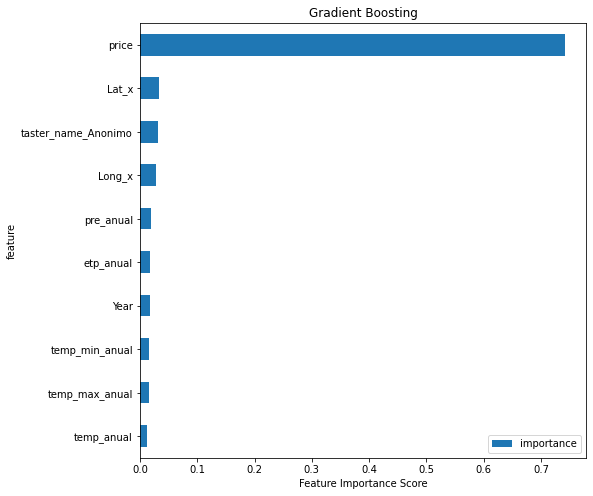

,importance
feature,
temp_anual,0.011953
temp_max_anual,0.015483
temp_min_anual,0.015497
Year,0.018264
etp_anual,0.018397
pre_anual,0.019750
Long_x,0.028779
taster_name_Anonimo,0.032330
Lat_x,0.032627


In [17]:
plot_feature_importances(grad_mod, X, y, title = 'Gradient Boosting')